# Classification
Classification adalah saat kita membuat Machine Learning Model untuk membuat prediksi dengan target tipe kelas/ label/ discrete.

Contohnya, kita membuat model yang memprediksi apakah seseorang positif covid atau tidak. Ada dua label di target ini: positif dan tidak.

Contoh lagi, kita membuat model yang memprediksi tipe bunga: mawar, melati, matahari. Ada tiga label di target ini: mawar, melati, matahari.

- Jika jumlah label adalah 2, kita namakan modelnya *binomial classification*
- Jika jumlah label adalah 3+, kita namakan modelnya *multinomial classification*

Algoritma untuk Classification yang akan kita demokan ada beberapa:
- Logistic Regression
- Naive Bayes
- K-Nearest Neighbor
- Decision Tree
- Random Forest
- Support Vector Machine

## Evaluasi
untuk mengevaluasi kualitas sebuah model tipe classification, kita gunakan dua hal:
1. Confusion Matrix
2. Classification Report (precision, recall, f1-score, overall accuracy)

### Confusion Matrix
matrix berisi angka yang menunjukkan untuk setiap label yang ada di target kita, dan untuk setiap prediksi yang dibuat model kita ke test data yang kita berikan, ada berapa:
- True Positive: label A, di prediksi A
- True Negative: label bukan A, di prediksi bukan A
- False Postive: label bukan A, di prediksi A
- False Negative: label A, di prediksi bukan A

### Classification Report
1. Precision: untuk satu label, misal label A, ada berapa yang di prediksi A dan beneran A
2. Recall: untuk satu label, misal label A, dari seluruh data A yang diberikan, ada berapa yang di prediksi A
3. F1-score: rata-rata precision dan recall yang dihitung dengan teknik tertentu
4. Accuracy: secara keseluruhan, dari semua hasil prediksi, berapa yang ditebak dengan benar

Membuat Machine Learning Model:
1. collect data
2. data preparation
- data cleaning
    - missing values
    - invalid values
    - data type
    - manipulasi kolom/ baris
- data exploration
    - mencari pattern
    - membuat visualisasi
    - cari korelasi
    - memahami pola data kita
- data preparation - step sebelum data dimasukkan ke model
    - scaling (data numerik)
    - encoding (data non-numerik)
- split data jadi training dan testing dataset
3. latih model
4. evaluasi
5. tuning

In [4]:
# import package yang diperlukan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Logistic Regression
from sklearn.linear_model import LogisticRegression

# evaluasi model Classification
from sklearn.metrics import confusion_matrix, classification_report

# split data
from sklearn.model_selection import train_test_split

# Case Study: Classification Heart Disease
Kita load data heart.csv yang berisi detail pasien, dan apakah pasien tersebut punya sakit jantung atau tidak.

Kita buat sebuah model Logistic Regression yang bisa mengklasifikasi apakah seseorang punya sakit jantung atau tidak jika diberikan informasi tertentu (fitur).

fitur fitur nya bisa kita pilih dari data yang ada di heart.csv

In [2]:
# import data
df_heart = pd.read_csv("../dataset/heart.csv")
df_heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


- kolom target (0 = sehat; 1 = sakit jantung)
- kolom sex (0 = female; 1 = male)

di data ini ada beberapa fitur yang bisa kita gunakan:
age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal

kita bisa menggunakan semua data ini sebagai fitur, bisa juga hanya memilih beberapa. Jika hanya memilih beberapa, kita perlu gunakan yang ada efek ke target. kita bisa gunakan hypothesis testing untuk feature selection. ATAU nanti saat kita mempelajari random forest, dia punya value yang namanya feature importance.

untuk sekarang, kita cukup pilih dari asumsi kita kira2 fitur mana yang relevan.

Kali ini kita gunakan: age, sex, chol, untuk membuat model klasifikasi apakah seseorang punya sakit jantung/ tidak.

In [5]:
# step data cleaning
# step data exploration
# scaling, encoding,
# pemilihan fitur

X = df_heart[["age", "sex", "chol"]]
y = df_heart["target"]

# split jadi train dan test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [6]:
# latih model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [7]:
# evaluasi model
y_pred = model.predict(X_test)

confusion_matrix(y_test, y_pred)

array([[79, 44],
       [53, 81]], dtype=int64)

confusion matrix dari sklearn memberikan data label ASLI sebagai rows, dan data PREDIKSI sebagai columns.

Di contoh data kita di atas, ada 2 label: 0 dan 1, sehat dan sakit. row pertama adalah label 0, sehat. row kedua adalah label 1, sakit.

Total ada 79 + 44 orang sehat, dan 53 + 81 orang sakit

In [11]:
print("0 sehat", 79+44)
print("1 sakit", 53+81)

0 sehat 123
1 sakit 134


In [9]:
y_test.value_counts()

1    134
0    123
Name: target, dtype: int64

kolom nya adalah hasil prediksi, model kita memprediksi ada 79 + 53 orang sehat, dan 44 + 81 orang sakit. 

Dari hasil prediksi ini, yang ditebak dengan benar adalah 79 orang sehat, dan 81 orang sakit.

In [25]:
def visualizeCM(cm):
    n = len(cm) # jumlah label/ kategori

    fig, ax = plt.subplots(figsize=(n+1, n+1))
    ax.imshow(cm)
    ax.grid(False)
    ax.xaxis.set(ticks=range(n))
    ax.set_xlabel("predicted")
    ax.yaxis.set(ticks=range(n))
    ax.set_ylabel("actual")
    ax.set_ylim( n - 0.5, n - 2.5)
    for i in range(n):
        for j in range(n):
            ax.text(j, i, cm[i, j], ha='center', va='center', color='black', fontsize = 20)
    plt.title("Confusion Matrix")
    plt.show()

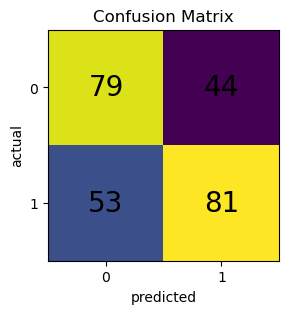

In [26]:
cm = confusion_matrix(y_test, y_pred)
visualizeCM(cm)

In [28]:
# classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.64      0.62       123
           1       0.65      0.60      0.63       134

    accuracy                           0.62       257
   macro avg       0.62      0.62      0.62       257
weighted avg       0.62      0.62      0.62       257



kita break sebentar, lalu lanjut ke Tuning. Kita coba ubah2 parameter model nya untuk mendapat model yang lebih akurat.

20.15 WIB